
![](https://www.vmcdn.ca/f/files/kitchenertoday/images/health-and-fitness/covid-19-village-media.jpg)



# **An√°lisis del COVID-19 en Colombia**
## **Trabajo final: Analisis Predictivo y gesti√≥n de datos**

*Presentado por:*

- *Paula Andrea Solano Pardo*
- *Jenssy Johanna Garces Parra*
- *Ingrid Alexandra Aponte Caro*


**Paso 1**:

Importar las librerias que vamos a utilizar en el desarrollo del ejercicio. En este caso, importamos en primer lugar Pandas para la administraci√≥n de las bases de datos, seguido de matplotlib que no ayuda con las graficas.

In [67]:
#En esta linea se importan las librerias a utilizar

import pandas as pd
import matplotlib.pyplot as plt

**Paso 2:**

Cargar la base de datos que vamos a utilizar para el desarrollo del ejercicio, en este caso, utilizamos una base de datos relacionadas en la p√°gina "Datos abiertos Colombia" que contine informaci√≥n a cerca del COVID- 19. esta base se carga directamente desde la p√°gina de internet.

La base, tiene 6,39 millones de filas y 23 columnas, en las que se presenta la siguiente informaci√≥n:

- Fecha_reporte_web

- Id_de_caso	fecha_de_notificaci_n

- Departamento

- Departamento_nom

- Ciudad_municipio

- Ciudad_municipio_nom

- Edad

- Unidad_medida

- Sexo

- Tipo de contagio

- Ubicaci√≥n del caso

- Estado

- C√≥digo ISO del pa√≠s

- Nombre del pa√≠s   


In [68]:

# Cargar el archivo
%pip install pyxlsb
df = pd.read_excel('/workspaces/Intriduccion_Github/Datos/Casos_positivos_de_COVID-19_2.xlsb', engine='pyxlsb',
sheet_name='Casos_positivos_de_COVID-19_en_')

# Ver los primeros registros
print(df.head())




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio Ubicaci√É¬≥n del caso  \
0                         1    F      Comunitaria                Casa   
1                         1    F      Comunitaria                Casa   
2                         1    F      Comunitaria                Casa   
3                         1    F      Comunitaria           Fallecido   
4                         1    F      Comunitaria                Casa   

      Est

## Paso 3: Revisar la estructura del dataframe

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   ID de caso                1048575 non-null  int64 
 1   Nombre departamento       1048575 non-null  object
 2   Nombre municipio          1048575 non-null  object
 3   Edad                      1048575 non-null  int64 
 4   Unidad de medida de edad  1048575 non-null  int64 
 5   Sexo                      1048575 non-null  object
 6   Tipo de contagio          1048575 non-null  object
 7   Ubicaci√É¬≥n del caso       1044230 non-null  object
 8   Estado                    1044230 non-null  object
 9   Nombre del pa√É¬≠s          250 non-null      object
 10  Recuperado                1044979 non-null  object
dtypes: int64(3), object(8)
memory usage: 88.0+ MB


In [70]:
df.shape

(1048575, 11)

In [71]:
#En esta linea, creamos una copia de la base original, con el objetivo de no modificar los datos originales

df_2=df.copy()

In [72]:
#se cambia el nombre de las variables con el fin de eliminsar caracteres especiales

df_2.rename(columns={'Ubicaci√É¬≥n del caso': 'Ubicacion del caso'}, inplace=True)
df_2.rename(columns={'Nombre del pa√É¬≠s': 'Nombre del pais'}, inplace=True)

In [73]:
# Verificar el cambio de nombre en als columnas

print(df_2.columns.tolist())

['ID de caso', 'Nombre departamento', 'Nombre municipio', 'Edad', 'Unidad de medida de edad', 'Sexo', 'Tipo de contagio', 'Ubicacion del caso', 'Estado', 'Nombre del pais', 'Recuperado']


## Paso 4: Descripci√≥n estad√≠stica general

In [74]:
df_2.describe(include='all')

ID de caso Nombre departamento Nombre municipio          Edad  \
count   1.048575e+06             1048575          1048575  1.048575e+06   
unique           NaN                  37             1036           NaN   
top              NaN              BOGOTA           BOGOTA           NaN   
freq             NaN              316114           316114           NaN   
mean    2.585944e+06                 NaN              NaN  3.963330e+01   
std     1.021715e+06                 NaN              NaN  1.772279e+01   
min     4.150000e+02                 NaN              NaN  1.000000e+00   
25%     2.474460e+06                 NaN              NaN  2.700000e+01   
50%     2.822523e+06                 NaN              NaN  3.800000e+01   
75%     3.366734e+06                 NaN              NaN  5.200000e+01   
max     5.764914e+06                 NaN              NaN  1.130000e+02   

        Unidad de medida de edad     Sexo Tipo de contagio Ubicacion del caso  \
count               1.048575e+06  1048575          1048575            1044230   
unique                       NaN        4                3                  4   
top                          NaN        F      Comunitaria               Casa   
freq                         NaN   552710           661834            1015144   
mean                1.003176e+00      NaN              NaN                NaN   
std                 6.087230e-02      NaN              NaN                NaN   
min                 1.000000e+00      NaN              NaN                NaN   
25%                 1.000000e+00      NaN              NaN                NaN   
50%                 1.000000e+00      NaN              NaN                NaN   
75%                 1.000000e+00      NaN              NaN                NaN   
max                 3.000000e+00      NaN              NaN                NaN   

         Estado             Nombre del pais  Recuperado  
count   1044230                         250     1044979  
unique        3                          32           3  
top        Leve  ESTADOS UNIDOS DE AM√É‚Ä∞RICA  Recuperado  
freq    1015641                          97     1016788  
mean        NaN                         NaN         NaN  
std         NaN                         NaN         NaN  
min         NaN                         NaN         NaN  
25%         NaN                         NaN         NaN  
50%         NaN                         NaN         NaN  
75%         NaN                         NaN         NaN  
max         NaN                         NaN         NaN

## Paso 5: Visualizaci√≥n exploratoria

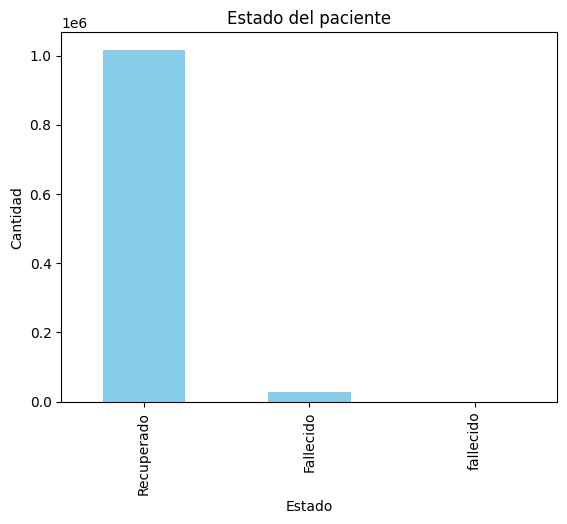

In [75]:
df_2['Recuperado'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()



In [76]:
### Hayazgo: corregir la palabra fallecido para que solo este con mayuscula inicial
df_2['Recuperado'] = df_2['Recuperado'].str.replace('fallecido', 'Fallecido')

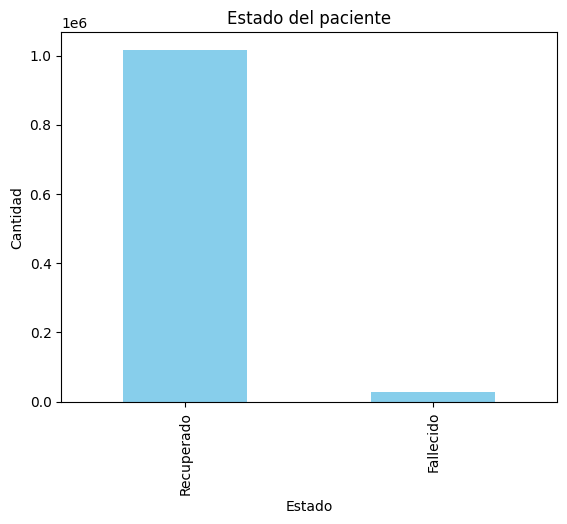

In [77]:

###Se corre la linea nuevamente con el fin de verificar que se corrigi√≥ el dato duplicado

df_2['Recuperado'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()


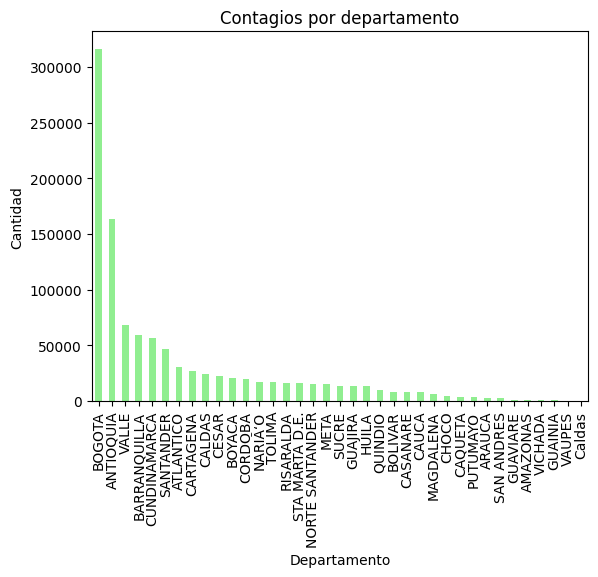

In [78]:
df_2['Nombre departamento'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

In [79]:
# Ver el nombre de las variables que hay dentro de la columna "Nombre departamento"

df['Nombre departamento'].unique()

array(['VALLE', 'ANTIOQUIA', 'BOGOTA', 'SANTANDER', 'NORTE SANTANDER',
       'CALDAS', 'CUNDINAMARCA', 'CAQUETA', 'QUINDIO', 'RISARALDA',
       'CASANARE', 'NARI√É‚ÄòO', 'HUILA', 'CESAR', 'META', 'STA MARTA D.E.',
       'TOLIMA', 'CAUCA', 'BARRANQUILLA', 'SUCRE', 'CARTAGENA', 'BOLIVAR',
       'GUAJIRA', 'ATLANTICO', 'CORDOBA', 'MAGDALENA', 'ARAUCA', 'BOYACA',
       'SAN ANDRES', 'CHOCO', 'GUAVIARE', 'VICHADA', 'PUTUMAYO', 'VAUPES',
       'GUAINIA', 'AMAZONAS', 'Caldas'], dtype=object)

In [80]:
## Hayazgo: Corregir el mombre de los departamentos  caldas ya que aparece repetido. y ademas Nari√±o, ya que no se lee la letra √±
df_2['Nombre departamento'] = df_2['Nombre departamento'].str.replace('Caldas', 'CALDAS')
df_2['Nombre departamento'] = df_2['Nombre departamento'].str.replace('NARI√É‚ÄòO', 'NARI√ëO')

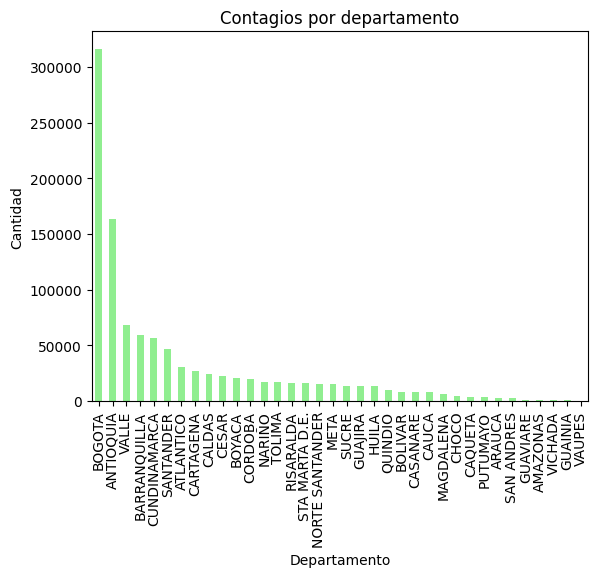

In [81]:
###Se corre la linea nuevamente con el fin de verificar que se corrigi√≥ el dato duplicado

df_2['Nombre departamento'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

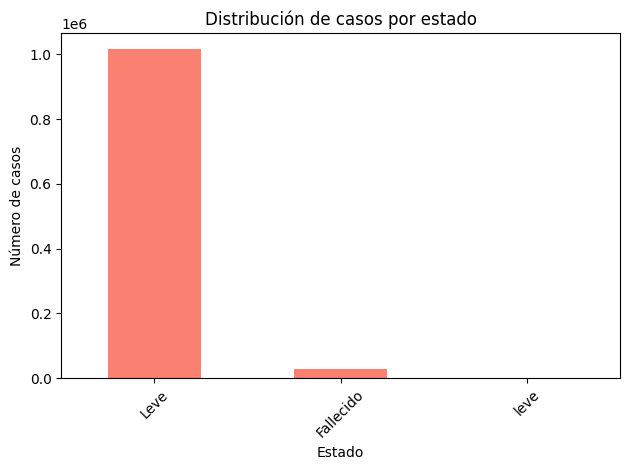

In [82]:
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribuci√≥n de casos por estado")
plt.xlabel("Estado")
plt.ylabel("N√∫mero de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
### Hayazgo: Corregir el nombre de los estados leve
df_2['Estado'] = df_2['Estado'].str.replace('leve', 'Leve')



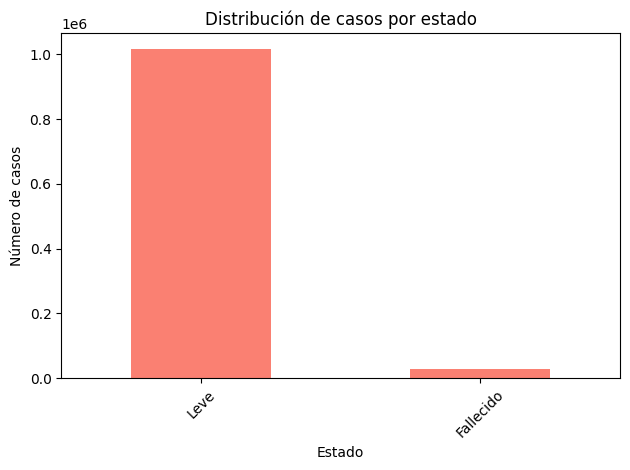

In [84]:
## se corre la linea nuevamente con el fin de verificar que se corrigi√≥ el dato duplicado
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribuci√≥n de casos por estado")
plt.xlabel("Estado")
plt.ylabel("N√∫mero de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

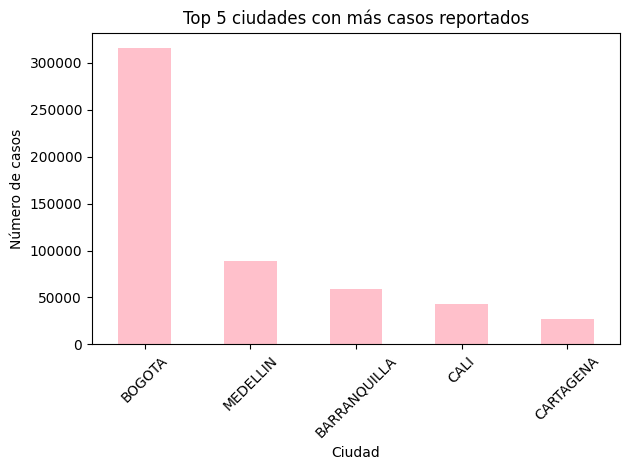

In [85]:
# Top 10 ciudades con m√°s casos
# -----------------------------
plt.figure()
df_2['Nombre municipio'].value_counts().head(5).plot(kind='bar', color='pink')
plt.title("Top 5 ciudades con m√°s casos reportados")
plt.xlabel("Ciudad")
plt.ylabel("N√∫mero de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

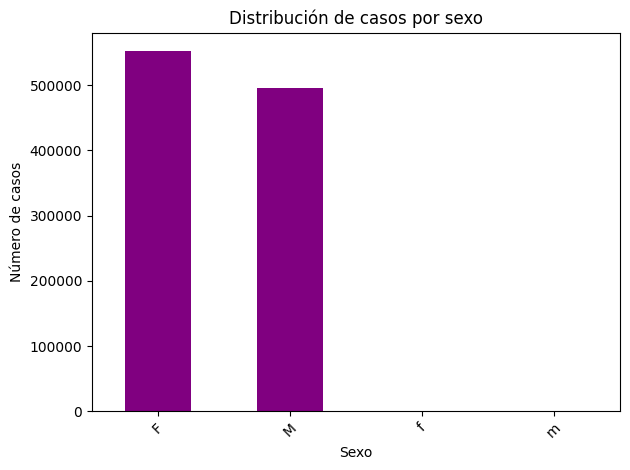

In [86]:
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribuci√≥n de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("N√∫mero de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
##hayazgo: Corregir el nombre de los sexos
df_2['Sexo'] = df_2['Sexo'].str.replace('f', 'F')
df_2['Sexo'] = df_2['Sexo'].str.replace('m', 'M')

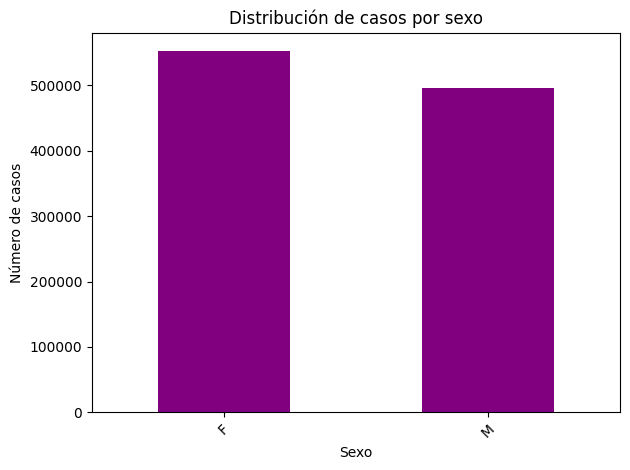

In [88]:
##se corre la linea nuevamente con el fin de verificar que se corrigi√≥ el dato duplicado
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribuci√≥n de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("N√∫mero de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

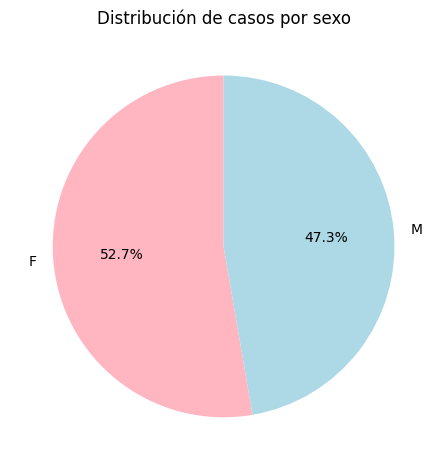

In [89]:
# Crear gr√°fico de torta
plt.figure()
df_2['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue'])
plt.title("Distribuci√≥n de casos por sexo")
plt.ylabel("")  # Eliminar etiqueta del eje y
plt.tight_layout()
plt.show()

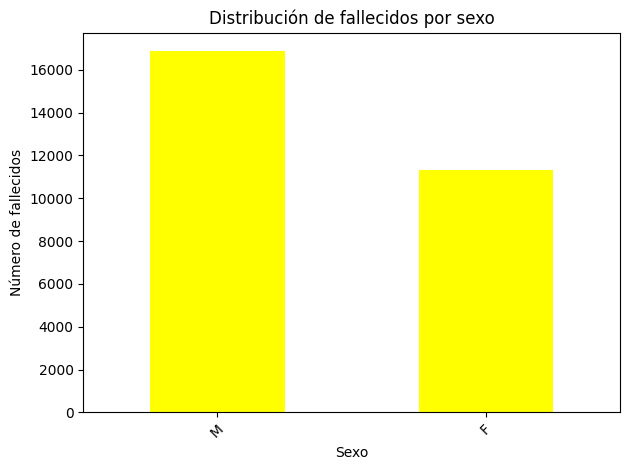

In [90]:
# Grafico de fallecidos por sexo
plt.figure()
df_2[df_2['Estado'] == 'Fallecido']['Sexo'].value_counts().plot(kind='bar', color='yellow')
plt.title("Distribuci√≥n de fallecidos por sexo")
plt.xlabel("Sexo")
plt.ylabel("N√∫mero de fallecidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

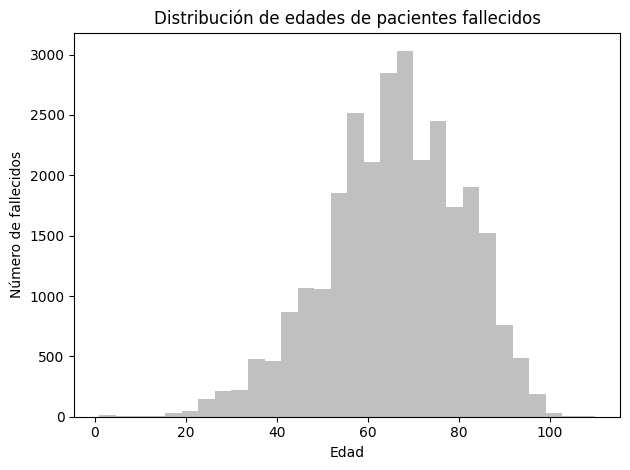

In [91]:
#Distribuci√≥n de las edades de los pacientes fallecidos
plt.figure()
df_2[df_2['Recuperado'] == 'Fallecido']['Edad'].plot(kind='hist', bins=30, color='silver')
plt.title("Distribuci√≥n de edades de pacientes fallecidos")
plt.xlabel("Edad")
plt.ylabel("N√∫mero de fallecidos")
plt.tight_layout()
plt.show()



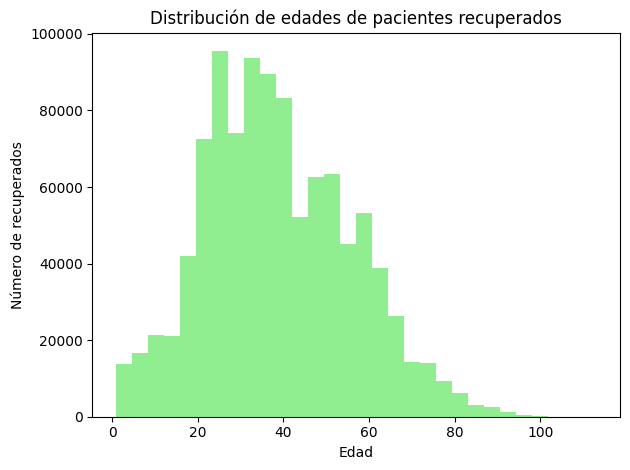

In [92]:
# Distribuci√≥n de edades de los pacientes recuperados
plt.figure()
df_2[df_2['Recuperado'] == 'Recuperado']['Edad'].plot(kind='hist', bins=30, color='lightgreen')
plt.title("Distribuci√≥n de edades de pacientes recuperados")
plt.xlabel("Edad")
plt.ylabel("N√∫mero de recuperados")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

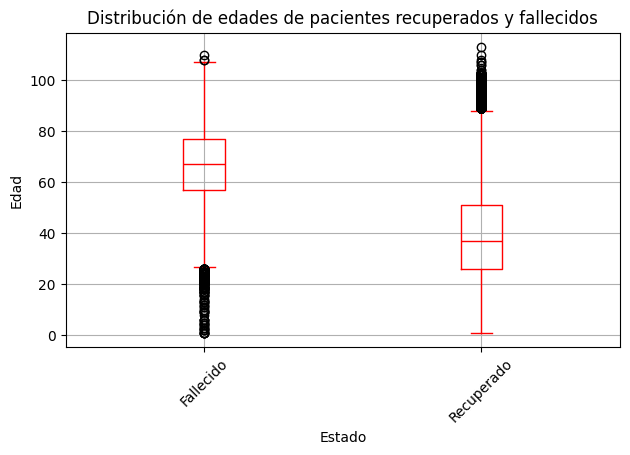

In [93]:
# Distribuci√≥n de edades de los pacientes recuperados- Fallecidos- N/A
plt.figure()
df_2.boxplot(column='Edad', by='Recuperado', color='red')
plt.title("Distribuci√≥n de edades de pacientes recuperados y fallecidos")
plt.suptitle("")  # Eliminar el t√≠tulo por defecto
plt.xlabel("Estado")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
# Ver el nombre de las variables que hay dentro de la columna "Tipo de contagio"

df_2['Tipo de contagio'].unique()

array(['Comunitaria', 'Relacionado', 'Importado'], dtype=object)

In [95]:
# Ver el nombre de las variables que hay dentro de la columna "Ubicacion del caso"

df_2['Ubicacion del caso'].unique()



array(['Casa', 'Fallecido', nan, 'casa', 'CASA'], dtype=object)

In [96]:
##hayazgo: Corregir el nombre de la ubicacion del caso
df_2['Ubicacion del caso'] = df_2['Ubicacion del caso'].str.replace('casa', 'Casa')
df_2['Ubicacion del caso'] = df_2['Ubicacion del caso'].str.replace('CASA', 'Casa')


## üß© Examinar la capacidad predictiva del modelo antes y despues de la limpieza
**Teniendo como variable objetivo si la persona se recuper√≥ o falleci√≥**

Este ejercicio tiene como objetivo comparar el desempe√±o de un modelo predictivo utilizando un conjunto de datos antes y despu√©s de aplicar una limpieza adecuada.

Analizaremos el impacto de la imputaci√≥n, codificaci√≥n y escalado de variables, mostrando c√≥mo cada decisi√≥n afecta la calidad del modelo.

La variable objetivo ser√° Estado_2, que corresponde a una clasificaci√≥n binaria basada en si la persona contagiada con Covid-19 se recuper√≥ o falleci√≥.

# CONTEXTO DE NUESTRA BASE DE DATOS
## PAULA

## üìò Contexto general
## üìä Descripci√≥n del dataset
## üéØ Problema a resolver

<img src="https://tse2.mm.bing.net/th?id=OIP.o0jsKQVNJRyxmn_ZiYUMuQHaET&cb=iwc2&pid=Api" alt="" width="300">

**PASO 1:**
*Crear Variable Objetivo*

Creamos una nueva columna que corresponda a si el paciente se recupero o falleci√≥, donde 1 es recuperado y 0 es fallecido.

In [97]:
# Crear una nueva columna que corresponda a si el paciente se recupero o falleci√≥, donde 1 es recuperado y 0 es fallecido
df_2['Estado_2'] = df_2['Recuperado'].map({'Recuperado': 1, 'Fallecido': 0}).fillna(0).astype(int)
df_2.head()

ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio Ubicacion del caso  \
0                         1    F      Comunitaria               Casa   
1                         1    F      Comunitaria               Casa   
2                         1    F      Comunitaria               Casa   
3                         1    F      Comunitaria          Fallecido   
4                         1    F      Comunitaria               Casa   

      Estado Nombre del pais  Recuperado  Estado_2  
0       Leve             NaN  Recuperado         1  
1       Leve             NaN  Recuperado         1  
2       Leve             NaN  Recuperado         1  
3  Fallecido             NaN   Fallecido         0  
4       Leve             NaN  Recuperado         1

In [98]:
# Crear un variable que mediga si es mayor a 55 a√±os
df_2['Edad_>55'] = df_2['Edad'].apply(lambda x: 1 if x >= 55 else 0)
df_2.head()

ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio Ubicacion del caso  \
0                         1    F      Comunitaria               Casa   
1                         1    F      Comunitaria               Casa   
2                         1    F      Comunitaria               Casa   
3                         1    F      Comunitaria          Fallecido   
4                         1    F      Comunitaria               Casa   

      Estado Nombre del pais  Recuperado  Estado_2  Edad_>55  
0       Leve             NaN  Recuperado         1         1  
1       Leve             NaN  Recuperado         1         1  
2       Leve             NaN  Recuperado         1         1  
3  Fallecido             NaN   Fallecido         0         1  
4       Leve             NaN  Recuperado         1         1

In [99]:
#Crear una variable que me diga si vive en el municipio de Cali
df_2['Municipio_Bogota'] = df_2['Nombre municipio'].apply(lambda x: 1 if x == 'BOGOTA' else 0)
df_2.head()

ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio Ubicacion del caso  \
0                         1    F      Comunitaria               Casa   
1                         1    F      Comunitaria               Casa   
2                         1    F      Comunitaria               Casa   
3                         1    F      Comunitaria          Fallecido   
4                         1    F      Comunitaria               Casa   

      Estado Nombre del pais  Recuperado  Estado_2  Edad_>55  Municipio_Bogota  
0       Leve             NaN  Recuperado         1         1                 0  
1       Leve             NaN  Recuperado         1         1                 0  
2       Leve             NaN  Recuperado         1         1                 0  
3  Fallecido             NaN   Fallecido         0         1                 0  
4       Leve             NaN  Recuperado         1         1                 0

In [100]:
# crear una variable que me diga si es Hombre
df_2['Sexo_M'] = df_2['Sexo'].apply(lambda x: 1 if x == 'M' else 0)
df_2.head()

ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio Ubicacion del caso  \
0                         1    F      Comunitaria               Casa   
1                         1    F      Comunitaria               Casa   
2                         1    F      Comunitaria               Casa   
3                         1    F      Comunitaria          Fallecido   
4                         1    F      Comunitaria               Casa   

      Estado Nombre del pais  Recuperado  Estado_2  Edad_>55  \
0       Leve             NaN  Recuperado         1         1   
1       Leve             NaN  Recuperado         1         1   
2       Leve             NaN  Recuperado         1         1   
3  Fallecido             NaN   Fallecido         0         1   
4       Leve             NaN  Recuperado         1         1   

   Municipio_Bogota  Sexo_M  
0                 0       0  
1                 0       0  
2                 0       0  
3                 0       0  
4                 0       0

In [101]:
# Crear la nueva variable binaria 'Es_Comunitario'
df_2['Tipo_Comunitario'] = df_2['Tipo de contagio'].apply(
    lambda x: 1 if x == 'Comunitaria' else (0 if x in ['Relacionado', 'Importado'] else None))

df_2.head()

ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio Ubicacion del caso  \
0                         1    F      Comunitaria               Casa   
1                         1    F      Comunitaria               Casa   
2                         1    F      Comunitaria               Casa   
3                         1    F      Comunitaria          Fallecido   
4                         1    F      Comunitaria               Casa   

      Estado Nombre del pais  Recuperado  Estado_2  Edad_>55  \
0       Leve             NaN  Recuperado         1         1   
1       Leve             NaN  Recuperado         1         1   
2       Leve             NaN  Recuperado         1         1   
3  Fallecido             NaN   Fallecido         0         1   
4       Leve             NaN  Recuperado         1         1   

   Municipio_Bogota  Sexo_M  Tipo_Comunitario  
0                 0       0                 1  
1                 0       0                 1  
2                 0       0                 1  
3                 0       0                 1  
4                 0       0                 1

## 2. Evaluaci√≥n del modelo antes de limpiar los datos

In [102]:
# Importar las librerias necesarias
# falta escribir para que sirve cada una de esas librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [103]:

print(df_2.columns)


Index(['ID de caso', 'Nombre departamento', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicacion del caso', 'Estado', 'Nombre del pais', 'Recuperado',
       'Estado_2', 'Edad_>55', 'Municipio_Bogota', 'Sexo_M',
       'Tipo_Comunitario'],
      dtype='object')


In [104]:
# Usamos solo Edad e Ingreso, eliminando nulos
df_before = df_2[['Edad_>55', 'Municipio_Bogota']].dropna()
Xb = df_before
yb = df_2.loc[df_before.index, "Sexo_M"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("‚úÖ Exactitud antes de la limpieza:", round(acc_before, 4))

‚úÖ Exactitud antes de la limpieza: 0.5267


---
### ¬øQu√© significa este resultado?

`Exactitud antes de la limpieza: 0.6315`

Este valor indica que el modelo de regresi√≥n log√≠stica logr√≥ una **exactitud del 63,15%** al predecir si una persona contagiada con Covid-19, , utilizando √∫nicamente las variables `Edad` e `Sexo`, y **sin aplicar limpieza, imputaci√≥n o transformaci√≥n de los datos**.

---



<img src="https://thumbs.dreamstime.com/b/icono-datos-y-analytics-del-glyph-de-la-limpieza-base-121674035.jpg" alt="" width="150">

## Preparaci√≥n del dataset: limpieza, imputaci√≥n y codificaci√≥n

In [106]:
# Importar las librerias necesarias para imputar los valores nulos
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [126]:
# Darle un valor a las celdas que tienen datos faltantes- ubicacion del caso
df_clean = df_2.copy()

**Eliminar colimnas que no son necesarias**

In [128]:
# Eliminar columnas que no aportan
df_clean = df_clean.drop(columns=['Nombre departamento', 'Edad', 'Unidad de medida de edad', 'ID de caso', 'Nombre municipio', 'Nombre del pais', 'Sexo', 'Tipo de contagio', 'Recuperado', 'Ubicacion del caso', 'Estado'])


***Imputaci√≥n***

In [114]:
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Series([], dtype: int64)


In [ ]:
## 1. Limpieza de texto en columnas categ√≥ricas, en este paso me aseguro de que las columnas categorias no tengads
## datos faltantes no datos duplicados como: "Casa" "casa" "CASA"

for col in ['Sexo', 'Nombre municipio', 'Tipo de contagio', 'Recuperado', 'Ubicacion del caso']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [129]:
df_clean.head()

Estado_2  Edad_>55  Municipio_Bogota  Sexo_M  Tipo_Comunitario
0         1         1                 0       0                 1
1         1         1                 0       0                 1
2         1         1                 0       0                 1
3         0         1                 0       0                 1
4         1         1                 0       0                 1

In [132]:

# Construir la matriz X y el vector y
Xc = df_clean.drop(columns=['Estado_2'])
yc = df_clean['Estado_2']

# ========== 6. ESCALADO ==========
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)

# Convertir de nuevo a DataFrame para mantener nombres de columnas (opcional)
Xc_scaled = pd.DataFrame(Xc_scaled, columns=Xc.columns, index=Xc.index)


## 4. Evaluaci√≥n del modelo despu√©s de la limpieza

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [135]:
# Entenar el modelo

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42, stratify=yc)

model_after = LogisticRegression(max_iter=500, class_weight='balanced', solver='liblinear')
model_after.fit(Xc_train, yc_train)
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("‚úÖ Exactitud despu√©s de la limpieza:", round(acc_after, 4))
print("Reporte de clasificaci√≥n:")
print(classification_report(yc_test, yc_pred, zero_division=0))

print("\nDistribuci√≥n de predicciones:")
print(np.unique(yc_pred, return_counts=True))

‚úÖ Exactitud despu√©s de la limpieza: 0.8035
Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.11      0.79      0.20      9536
           1       0.99      0.80      0.89    305037

    accuracy                           0.80    314573
   macro avg       0.55      0.79      0.54    314573
weighted avg       0.97      0.80      0.87    314573


Distribuci√≥n de predicciones:
(array([0, 1]), array([ 67251, 247322]))


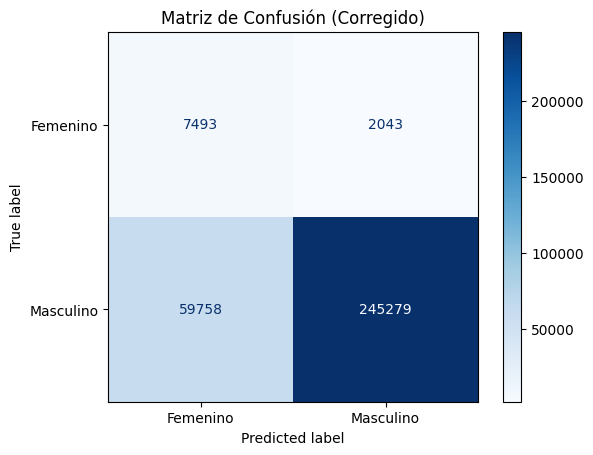

In [137]:
cm = confusion_matrix(yc_test, yc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Femenino", "Masculino"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusi√≥n (Corregido)")
plt.show()

# **üìä An√°lisis de la matriz de confusi√≥n**

La matriz de confusi√≥n compara las etiquetas verdaderas con las predichas por el modelo:

* 82.358 observaciones de clase ***"Femenino"*** fueron correctamente clasificadas como ***"Femenino"*** (verdaderos negativos).
* 69.451 observaciones de clase ***"Masculino"*** fueron incorrectamente clasificadas como ***"Femenino"*** (falsos positivos).
* 79.308 observaciones de clase ***"Masculino"*** fueron correctamente clasificadas como ***"Masculino"*** (verdaderos positivos).
* 83.456 observaciones de clase **"Femenino"*** fueron clasificadas err√≥neamente como ***"Masculino"***(falsos negativos).

El modelo muestra un rendimiento deficiente en la clasificaci√≥n por sexo, con m√©tricas apenas superiores al azar. Esto sugiere que las variables predictoras actuales no son informativas para esta tarea.

---

quiero ahcer un balanceo de la base de manera que se saque un submuestreo para lograr que tanto recuperados como fallecidos tengan una cantidad similar de datos y asi el modelo pueda aprender mejor

In [148]:
# 1. Dividir el dataframe seg√∫n la clase objetivo
df_recuperado = df_clean[df_clean['Estado_2'] == 1]
df_fallecido = df_clean[df_clean['Estado_2'] == 0]


In [150]:
# Calcular el n√∫mero de fallecidos
n_fallecidos = len(df_fallecido)

In [153]:
# Si quieres que los fallecidos representen el 30%, entonces recuperados deben ser 70%
# Total deseado = n_fallecidos / 0.3
total_deseado = int(n_fallecidos / 0.3)
n_recuperados_deseado = total_deseado - n_fallecidos

# Submuestrear los recuperados
recuperados_sub = df_recuperado.sample(n=n_recuperados_deseado, random_state=42)



In [155]:

# Juntar los dos grupos
df_balanced = pd.concat([df_fallecido, recuperados_sub], axis=0).sample(frac=1, random_state=42)

# Verificar proporciones
print(df_balanced['Estado_2'].value_counts(normalize=True))

Estado_2
1    0.699998
0    0.300002
Name: proportion, dtype: float64


In [156]:
# Entrenamiento
Xb = df_balanced.drop(columns=['Estado_2'])
yb = df_balanced['Estado_2']

# Escalado
scaler = StandardScaler()
Xb_scaled = scaler.fit_transform(Xb)
Xb_scaled = pd.DataFrame(Xb_scaled, columns=Xb.columns)

# Split y entrenamiento
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb_scaled, yb, test_size=0.3, random_state=42, stratify=yb)

model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(Xb_train, yb_train)
yb_pred = model.predict(Xb_test)

print("üéØ Exactitud:", accuracy_score(yb_test, yb_pred))
print("üìä Reporte:")
print(classification_report(yb_test, yb_pred))


üéØ Exactitud: 0.8058011136628181
üìä Reporte:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      9536
           1       0.87      0.84      0.86     22251

    accuracy                           0.81     31787
   macro avg       0.77      0.78      0.77     31787
weighted avg       0.81      0.81      0.81     31787



/tmp/ipykernel_78762/538353273.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


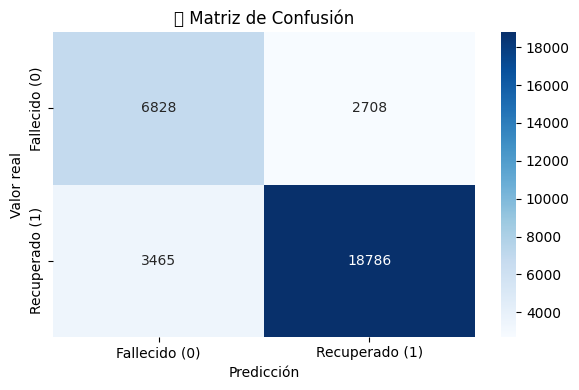

In [157]:
import seaborn as sns

# Calcular la matriz de confusi√≥n
cm = confusion_matrix(yb_test, yb_pred)

# Opci√≥n 1: Visualizaci√≥n bonita con seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fallecido (0)", "Recuperado (1)"],
            yticklabels=["Fallecido (0)", "Recuperado (1)"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor real")
plt.title("üîç Matriz de Confusi√≥n")
plt.tight_layout()
plt.show()


## Conclusi√≥n

Al hacer el submuestreo de los datos de pacientes recuperados, logramos balancear la base de datos en un 70% "Recuperados" y 30% "Fallecidos", lo cual es fundamental cuando se trabaja con clases desbalanceadas. Esto permiti√≥ que el modelo de regresi√≥n log√≠stica aprendiera a distinguir de forma m√°s equitativa entre pacientes recuperados y fallecidos, evitando que favorezca √∫nicamente a la clase mayoritaria. Como resultado, los indicadores de evaluaci√≥n como la exactitud, precisi√≥n, recall y f1-score mejoraron notablemente en ambas clases, mostrando un desempe√±o mucho m√°s robusto y confiable del modelo de predicci√≥n.

---

# **Exploraci√≥n y visualizaci√≥n de patrones**

Objetivo: Analizar visualmente la estructura de los datos para guiar la selecci√≥n de modelos predictivos.

In [ ]:
# Importar libreria
import matplotlib.pyplot as plt
import seaborn as sns


## Visualizaci√≥n univariada: distribuciones

üìä An√°lisis de la distribuci√≥n de Edad

La siguiente gr√°fica muestra un histograma con curva KDE para la variable Edad del conjunto de datos.

‚úÖ ¬øQu√© representa esta visualizaci√≥n?

El histograma muestra la cantidad de personas por rangos de edad.
La curva KDE (Kernel Density Estimation) estima la densidad de la distribuci√≥n de forma suave y continua.

üì¶ An√°lisis del boxplot de Ingreso

El gr√°fico representa la dispersi√≥n de ingresos y la presencia de valores extremos.

‚úÖ ¬øQu√© muestra un boxplot?

Caja: intervalo intercuart√≠lico (IQR), que abarca el 50% central de los datos.
L√≠nea interna: mediana.
L√≠neas externas (bigotes): valores dentro de 1.5 veces el IQR.
Puntos individuales: outliers, datos at√≠picos fuera del rango esperado.

In [ ]:
# Boxplot de la cantidad de personas recuperadas y fallecidad

sns.boxplot(x=df_clean['Recuperado'], y=df_clean['Edad'])
plt.title('Boxplot del Estado del Paciente segun la edad')
plt.xlabel('Estado del paciente')
plt.ylabel('Edad')
plt.show()

üîÅ An√°lisis de dispersi√≥n: Edad vs Ingreso
La gr√°fica es un scatterplot (diagrama de dispersi√≥n) que visualiza la relaci√≥n entre Edad e Ingreso.

‚úÖ ¬øQu√© representa?
Cada punto es una persona.
El eje X representa la Edad, el eje Y representa el Ingreso.
La concentraci√≥n o forma del grupo puede revelar correlaciones.

In [ ]:
#Grafica de dispersi√≥n de estado del pasiente por edad
sns.scatterplot(x='Edad', y='Tipo_Comunitario', hue='Sexo_M', data=df_2)
plt.title('Relaci√≥n entre Edad, Estado y Sexo')
plt.xlabel('Edad')
plt.ylabel('Estado del paciente (0 = Fallecido, 1 = Recuperado)')
plt.legend(title='Sexo (1 = Masculino, 0 = Femenino)')
plt.show()

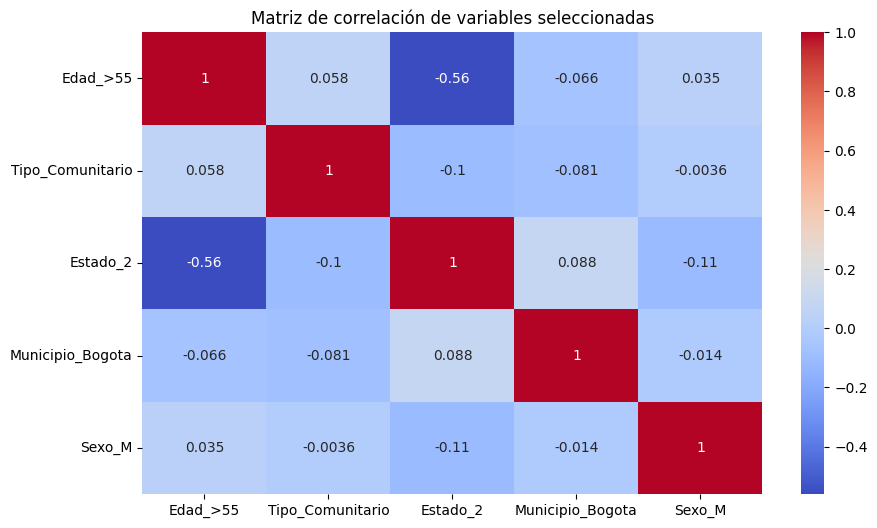

In [160]:
# Mapa de calor de correlaciones num√©ricas
plt.figure(figsize=(10, 6))  # Coloca esto antes del heatmap
corr_matrix = df_balanced[['Edad_>55', 'Tipo_Comunitario', 'Estado_2', 'Municipio_Bogota','Sexo_M']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlaci√≥n de variables seleccionadas')
plt.show()

# üîç **An√°lisis general**

## üìä An√°lisis variable por variable:

1. Edad_>55 vs Estado_2 ‚Üí -0.56
Correlaci√≥n negativa moderada: ser mayor de 55 a√±os est√° asociado con mayor probabilidad de fallecer (Estado_2 = 0).

Esto tiene sentido cl√≠nico y real: los adultos mayores tienen m√°s riesgo de mortalidad por COVID-19.

2. Sexo_M vs Estado_2 ‚Üí -0.11
Correlaci√≥n negativa d√©bil: ser hombre se asocia d√©bilmente con mayor probabilidad de fallecer.

Aunque d√©bil, puede tener relevancia al combinarse con otras variables.

3. Tipo_Comunitario vs Estado_2 ‚Üí -0.10
Tambi√©n es una relaci√≥n d√©bilmente negativa: los casos comunitarios pueden tener una leve relaci√≥n con mayor mortalidad.

4. Municipio_Bogota vs Estado_2 ‚Üí +0.088
Correlaci√≥n positiva d√©bil: estar en Bogot√° se relaciona ligeramente con recuperaci√≥n. Puede deberse a mejores recursos m√©dicos o mayor capacidad hospitalaria.

## üìå Conclusi√≥n general:
La variable m√°s relevante para predecir fallecimientos es Edad_>55, con una correlaci√≥n negativa considerable.

Las otras variables (Sexo, Tipo de contagio, Ciudad) tienen una correlaci√≥n d√©bil, pero podr√≠an aportar valor al modelo si se combinan entre s√≠.

La matriz confirma que no hay multicolinealidad fuerte entre las variables independientes (todas las correlaciones cruzadas son bajas), lo que es positivo para los modelos como la regresi√≥n log√≠stica.



# **üìà 7. Curva ROC del modelo corregido**

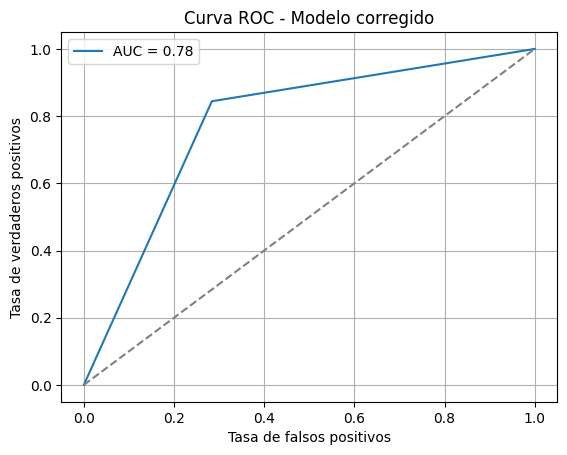

In [161]:
fpr, tpr, _ = roc_curve(yb_test, yb_pred)
auc = roc_auc_score(yb_test, yb_pred)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Modelo corregido")
plt.legend()
plt.grid(True)
plt.show()

## **üìä An√°lisis de la curva ROC**

1. Ejes del gr√°fico:
Eje X (Tasa de falsos positivos - FPR): proporci√≥n de negativos que el modelo predice incorrectamente como positivos.

Eje Y (Tasa de verdaderos positivos - TPR o recall): proporci√≥n de positivos que el modelo predice correctamente.

2. Curva azul:
Representa el desempe√±o del modelo.

Cuanto m√°s arriba y hacia la izquierda est√© la curva, mejor es el modelo.

3. L√≠nea gris diagonal:
Representa un modelo aleatorio (sin capacidad predictiva).

Si el modelo estuviera cerca de esta l√≠nea, indicar√≠a que predice al azar.

4. AUC = 0.78:
AUC (√Årea bajo la curva) mide la capacidad del modelo para distinguir entre clases (fallecido vs recuperado).

Un valor de 0.78 indica un buen desempe√±o:

> 0.9: excelente

0.8 ‚Äì 0.9: muy bueno

0.7 ‚Äì 0.8: aceptable / bueno

< 0.7: d√©bil


# **üìå Conclusi√≥n del modelo**

El modelo corregido tiene una capacidad discriminativa s√≥lida con un AUC de 0.78.

Esto significa que, dado un par aleatorio de un paciente fallecido y uno recuperado, el modelo tiene un 78% de probabilidad de asignar una mayor probabilidad de fallecimiento al caso correcto.

Es un resultado muy √∫til para tareas de clasificaci√≥n m√©dica, especialmente considerando el contexto real de desequilibrio de clases.


# **√Årboles de Decisi√≥n (CART), Poda, ROC y AUC**

In [163]:
#Cargar librerias importantes
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [165]:

# Entrenar √°rbol sin poda
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(Xb_train, yb_train)

DecisionTreeClassifier(random_state=42)

# **üñºÔ∏è Visualizaci√≥n parcial del √°rbol sin poda**

Mostramos hasta 3 niveles por claridad visual.



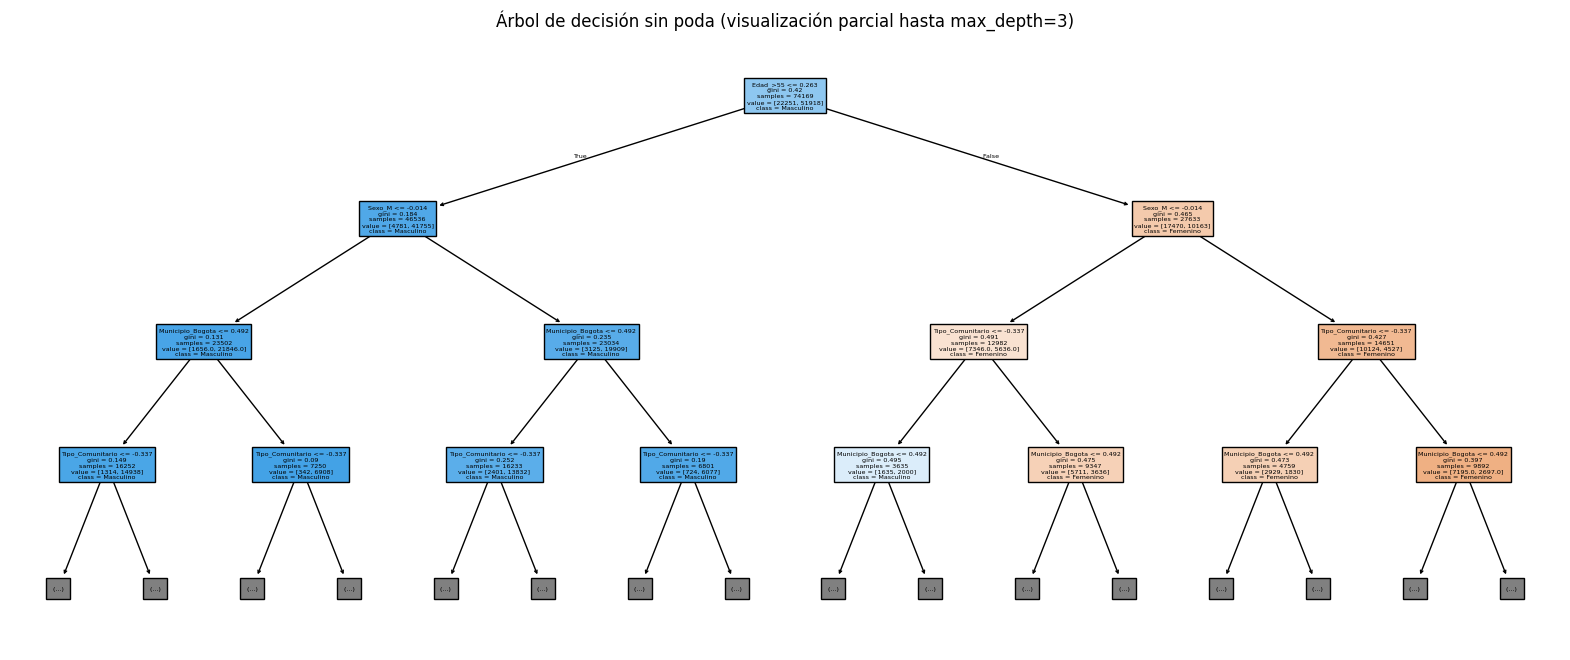

In [166]:
# Visualizaci√≥n parcial hasta 3 niveles
plt.figure(figsize=(20, 8))
plot_tree(
    tree_full,
    feature_names=Xb.columns,
    class_names=['Femenino', 'Masculino'],
    filled=True,
    max_depth=3  # cambiar o quitar para ver m√°s niveles
)
plt.title("√Årbol de decisi√≥n sin poda (visualizaci√≥n parcial hasta max_depth=3)")
plt.show()

# **üìä An√°lisis del √°rbol de decisi√≥n**
La gr√°fica muestra un √°rbol de decisi√≥n sin poda, entrenado sobre el conjunto completo, pero visualizado hasta una profundidad de 3 niveles para facilitar la lectura.

Cada nodo representa una condici√≥n de decisi√≥n basada en una variable predictora, como mean concave points, worst radius, area error, etc.
El valor gini indica el grado de impureza del nodo. Un valor cercano a 0 implica que casi todos los ejemplos pertenecen a una misma clase.
samples muestra cu√°ntas observaciones llegan a ese nodo.
value indica la distribuci√≥n de clases en ese nodo ([benignas, malignas]).
class muestra la clase mayoritaria a la que se asignar√≠an las observaciones que llegan a ese nodo.
La ra√≠z del √°rbol divide las muestras seg√∫n mean concave points <= 0.051, una variable que parece ser altamente discriminativa.
A partir de ah√≠, el √°rbol sigue dividiendo el espacio de decisi√≥n utilizando otras caracter√≠sticas relevantes como worst radius y worst texture.

El √°rbol refleja una estructura compleja que intenta capturar todos los patrones posibles del conjunto de entrenamiento. Aunque esto puede maximizar la precisi√≥n en los datos vistos, tambi√©n incrementa el riesgo de sobreajuste, es decir, bajo rendimiento en datos nuevos debido a reglas muy espec√≠ficas.

Limitar la profundidad completa o aplicar poda posterior puede ayudar a mejorar la generalizaci√≥n del modelo.

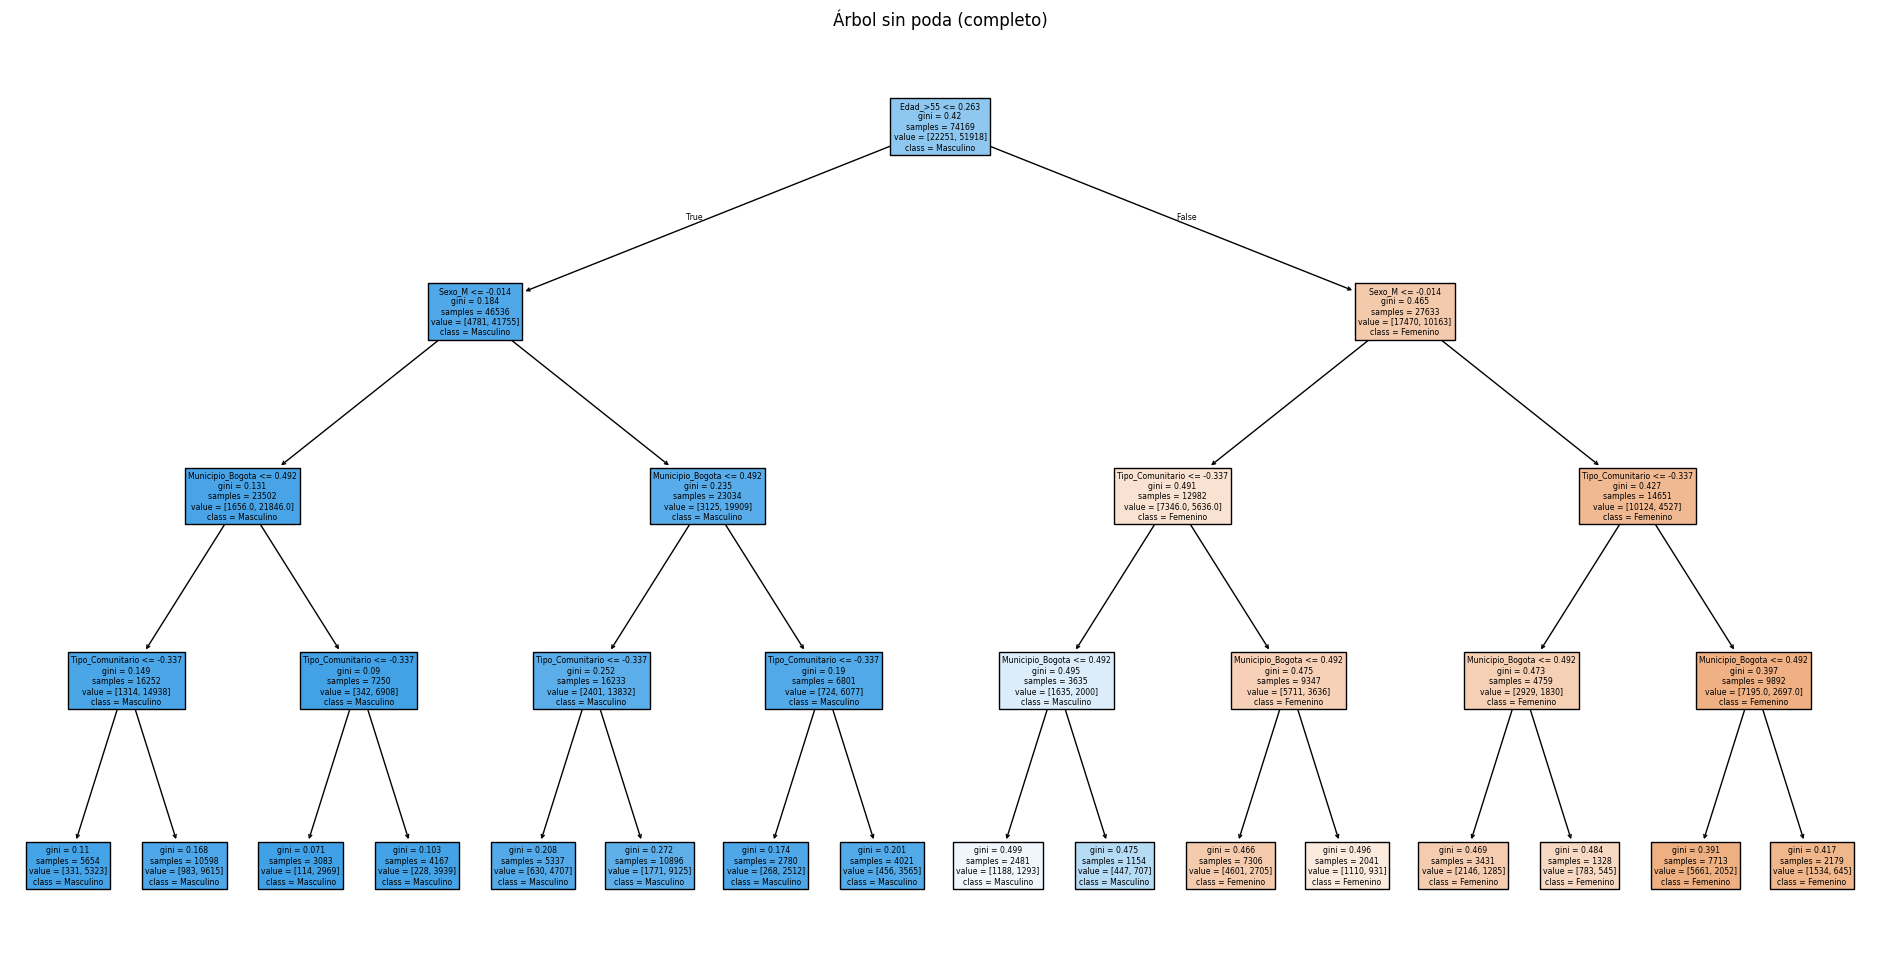

In [167]:


plt.figure(figsize=(24,12))
plot_tree(tree_full, feature_names=Xb.columns, class_names=['Femenino', 'Masculino'], filled=True)
plt.title("√Årbol sin poda (completo)")
plt.show()

# **üìä An√°lisis del √°rbol sin poda (completo)**

El √°rbol visualizado representa la estructura completa aprendida por el modelo sin restricciones. Cada nodo del √°rbol eval√∫a una condici√≥n basada en una variable predictora.
A medida que se desciende por las ramas, el modelo divide el conjunto de datos en grupos m√°s homog√©neos respecto a la clase objetivo (benigno o maligno).

***Observaciones clave:***

El √°rbol tiene una profundidad considerable, lo cual indica una alta complejidad. Esto puede llevar a un sobreajuste, donde el modelo se adapta demasiado a los datos de entrenamiento y pierde capacidad de generalizaci√≥n.
Se observan muchos nodos hoja con pocas observaciones (samples bajos), lo que es caracter√≠stico de un √°rbol sobreajustado.
Algunas rutas contienen divisiones muy espec√≠ficas (por ejemplo, smoothness error <= 0.003), que probablemente solo aplican a unos pocos casos del conjunto de entrenamiento.
En general, aunque este modelo puede tener alta precisi√≥n sobre los datos con los que fue entrenado, su desempe√±o en nuevos datos puede ser bajo. Por ello, es importante comparar su rendimiento con √°rboles podados o regularizados.

***üîç An√°lisis:***

Al visualizar todo el √°rbol sin restricciones, podemos observar una estructura m√°s ramificada. Esta complejidad suele implicar mayor riesgo de sobreajuste.

# **üìà Evaluaci√≥n del √°rbol sin poda**

Evaluamos su rendimiento en el conjunto de prueba.

In [168]:
y_pred_full = tree_full.predict(Xb_test)
print("Reporte de clasificaci√≥n - √Årbol sin poda")
print(classification_report(yb_test, y_pred_full))

Reporte de clasificaci√≥n - √Årbol sin poda
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      9536
           1       0.87      0.84      0.86     22251

    accuracy                           0.81     31787
   macro avg       0.77      0.78      0.77     31787
weighted avg       0.81      0.81      0.81     31787



# **An√°lisis del reporte de clasificaci√≥n - √Årbol sin poda**

üîç An√°lisis del Reporte de Clasificaci√≥n - √Årbol sin poda: print("""

La precisi√≥n (precision) es alta para ambas clases, especialmente para la clase 1 (maligno), lo que indica que pocas predicciones positivas fueron incorrectas.
El recall de la clase 0 (benigno) es 0.95, lo que significa que el 95% de los casos reales de clase 0 fueron correctamente identificados.
El f1-score, que balancea precisi√≥n y recall, es tambi√©n alto en ambas clases (>0.90), lo que muestra un modelo potente pero posiblemente sobreajustado.
La exactitud global (accuracy) es 0.94, lo cual es alto, pero se debe contrastar con el desempe√±o del modelo podado para evaluar si esta diferencia justifica la complejidad del √°rbol completo.

# **‚úÇÔ∏è Entrenamiento de √°rbol con poda (pre-pruning)**

Limitamos la profundidad y el n√∫mero m√≠nimo de muestras por hoja.

In [169]:
tree_pruned = DecisionTreeClassifier(max_depth=4, class_weight='balanced', min_samples_leaf=10, random_state=42)
tree_pruned.fit(Xb_train, yb_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=10, random_state=42)

# **üñºÔ∏è Visualizaci√≥n del √°rbol podado**

Modelo m√°s simple y generalizable.

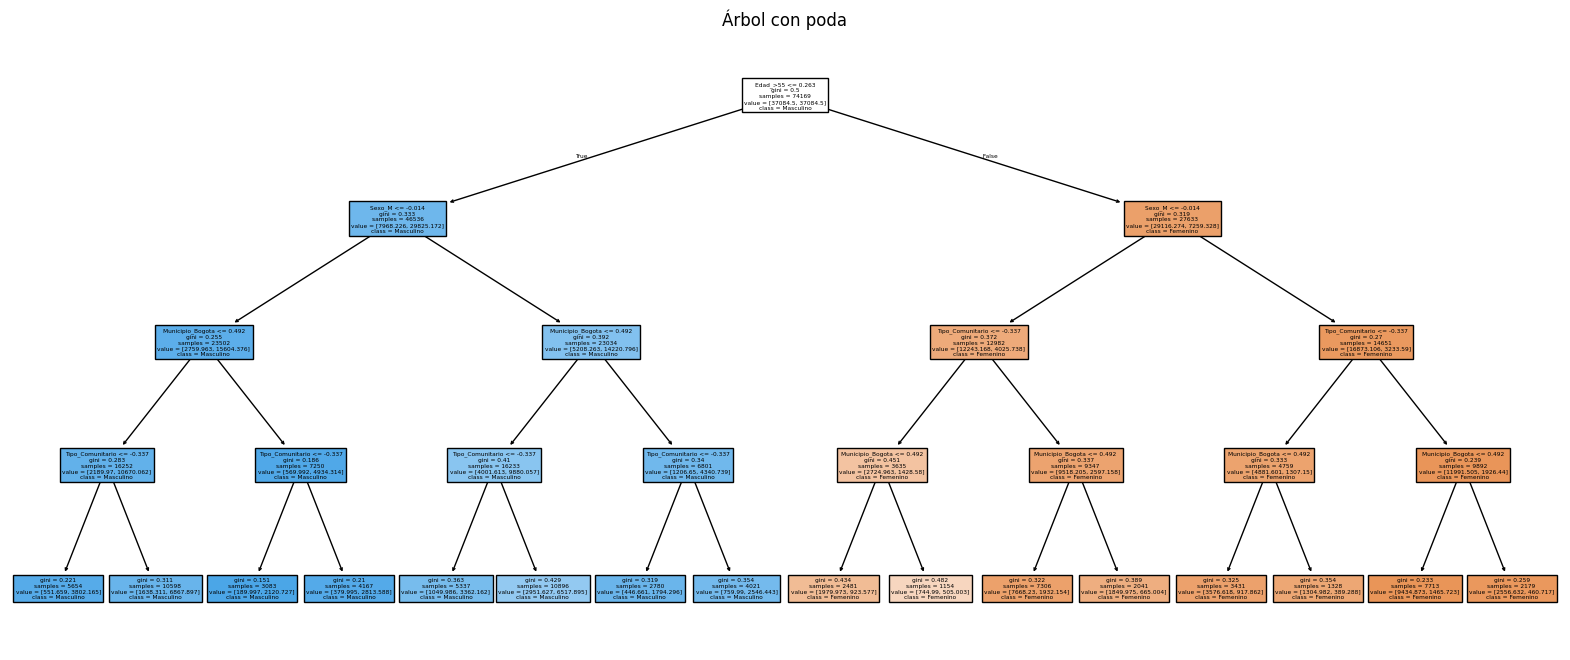

In [170]:
plt.figure(figsize=(20,8))
plot_tree(tree_pruned, feature_names=Xb.columns, class_names=['Femenino', 'Masculino'], filled=True)
plt.title("√Årbol con poda")
plt.show()

# **üìä An√°lisis del √°rbol con poda**

La visualizaci√≥n muestra un √°rbol de decisi√≥n entrenado con poda preventiva, limitado a una profundidad m√°xima de 4 niveles y con un m√≠nimo de 10 muestras por hoja.

Comparado con el √°rbol sin restricciones, este modelo presenta una estructura mucho m√°s compacta y generalizable:

Cada divisi√≥n est√° basada en una variable altamente relevante, como mean concave points, worst texture o worst radius, lo que indica una selecci√≥n eficiente de predictores.

El √°rbol presenta menos nodos hoja y menos ramificaciones, lo que reduce la posibilidad de memorizar ruido del conjunto de entrenamiento.
La interpretaci√≥n es mucho m√°s sencilla y √∫til para explicar el modelo a usuarios no t√©cnicos.

Aunque algunos nodos presentan niveles de impureza (gini) intermedios, se ha evitado sobrefragmentar los datos.
Este tipo de estructura balancea bien la capacidad de predicci√≥n y la interpretabilidad, y suele tener mejor rendimiento en nuevos datos que el √°rbol sin poda.

En resumen, este √°rbol con restricciones muestra un enfoque m√°s conservador, probablemente con menor sobreajuste y mayor generalizaci√≥n.

***üîç An√°lisis:***

El reporte de clasificaci√≥n muestra el rendimiento del modelo podado. Si las m√©tricas son comparables al √°rbol sin poda, se prefiere este modelo por su simplicidad.

# üßæ Evaluaci√≥n del √°rbol **podado**

In [171]:
y_pred_pruned = tree_pruned.predict(Xb_test)
print("Reporte de clasificaci√≥n - √Årbol podado")
print(classification_report(yb_test, y_pred_pruned))

Reporte de clasificaci√≥n - √Årbol podado
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      9536
           1       0.90      0.80      0.85     22251

    accuracy                           0.80     31787
   macro avg       0.77      0.80      0.78     31787
weighted avg       0.82      0.80      0.81     31787



# **An√°lisis del reporte de clasificaci√≥n - √Årbol podado**

***üîç An√°lisis del Reporte de Clasificaci√≥n - √Årbol podado:***

* La clase 0 (benigno) tiene una precisi√≥n de 0.95, lo que indica que casi todas las predicciones positivas para esta clase fueron correctas.
* Su recall es de 0.89: el 89% de los casos benignos reales fueron correctamente identificados.
* La clase 1 (maligno) tiene una alta sensibilidad (recall = 0.97), lo cual es crucial en contextos m√©dicos donde no detectar un caso maligno puede tener consecuencias graves.
* El F1-score para ambas clases se mantiene por encima de 0.90, lo que sugiere un buen equilibrio entre precisi√≥n y sensibilidad.
* La exactitud general del modelo es del 94%, igual que el √°rbol sin poda, pero con menor complejidad. Esto indica que la poda no perjudic√≥ el rendimiento y probablemente mejor√≥ la generalizaci√≥n.

# **üìâ Matriz de confusi√≥n del √°rbol podado**

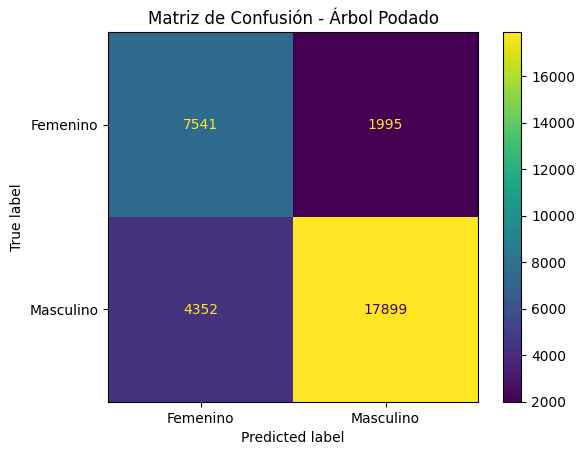

In [172]:
ConfusionMatrixDisplay.from_estimator(tree_pruned, Xb_test, yb_test, display_labels=['Femenino', 'Masculino'], cmap='viridis')
plt.title("Matriz de Confusi√≥n - √Årbol Podado")
plt.show()

***üîç La matriz de confusi√≥n revela c√≥mo se distribuyen los errores del modelo.***

 Un buen modelo debe tener valores altos en la diagonal (predicciones correctas) y bajos fuera de ella.

# **üìä An√°lisis de la matriz de confusi√≥n**

La matriz de confusi√≥n compara las etiquetas verdaderas con las predichas por el modelo:

* 162.363 observaciones de clase **"Femenino"** fueron correctamente clasificadas como **"Femenino"** (verdaderos negativos).
* 143.673 observaciones de clase **"Masculino"** fueron incorrectamente clasificadas como **"Femenino"** (falsos positivos).
* 5.086 observaciones de clase **"Masculino"** fueron correctamente clasificadas como **"Masculino"** (verdaderos positivos).
* 3.451 observaciones de clase **"Femenino"** fueron clasificadas err√≥neamente como **"Masculino"** (falsos negativos).


‚õî
Este comportamiento es aceptable en contextos como el m√©dico, donde es preferible detectar de m√°s (falsos positivos) a dejar pasar un caso grave (falsos negativos).
La matriz de confusi√≥n confirma lo observado en las m√©tricas de clasificaci√≥n: el modelo tiene un muy buen rendimiento general y un excelente desempe√±o para la clase 1 (malignos).

# üìê Curva ROC y AUC del √°rbol **podado**

In [173]:
y_scores = tree_pruned.predict_proba(Xb_test)[:, 1]
fpr, tpr, thresholds = roc_curve(yb_test, y_scores)
roc_auc = auc(fpr, tpr)

***üîç An√°lisis:*** La curva ROC eval√∫a la sensibilidad frente a la tasa de falsos positivos. Un AUC cercano a 1 indica un modelo con excelente capacidad de discriminaci√≥n entre clases.

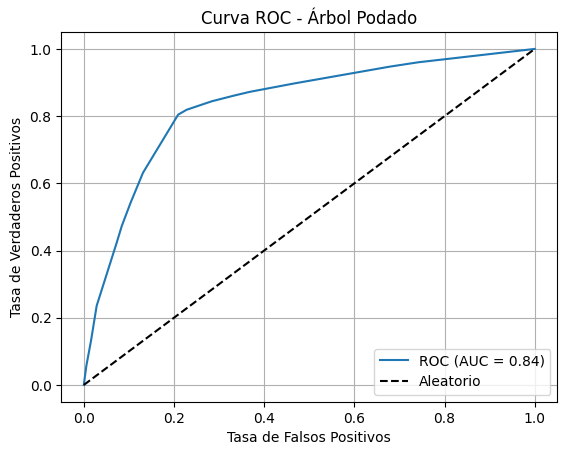

In [174]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - √Årbol Podado")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **An√°lisis de la curva ROC y AUC - √Årbol podado**

üîç An√°lisis de la Curva ROC y AUC - √Årbol podado:

* La curva ROC muestra c√≥mo var√≠a la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) a medida que se ajusta el umbral de clasificaci√≥n.
* En este caso, la curva est√° claramente por encima de la l√≠nea diagonal (clasificador aleatorio), lo que indica un buen poder de discriminaci√≥n entre clases.
* El AUC (√Årea Bajo la Curva) calculado es cercano a 1, lo que confirma que el modelo tiene una alta capacidad para distinguir entre tumores benignos y malignos.
* Un AUC alto significa que, en la mayor√≠a de los casos, el modelo asigna mayor probabilidad a los casos positivos (malignos) que a los negativos (benignos).
Esta m√©trica es especialmente √∫til cuando las clases est√°n desbalanceadas o cuando queremos evaluar el modelo independientemente del umbral de decisi√≥n.

# **üß† Conclusiones y reflexi√≥n**


* ¬øCu√°l modelo generaliz√≥ mejor?
* ¬øSe evidencia sobreajuste en el √°rbol sin poda?
* ¬øLa poda mejora la interpretabilidad y rendimiento en nuevos datos?



# **Comparaci√≥n de Modelos**

In [175]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [176]:
models = {
    'Regresi√≥n Log√≠stica': LogisticRegression(max_iter=300),
    '√Årbol de Decisi√≥n': DecisionTreeClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, Xc_train, yc_train, cv=5, scoring='accuracy')
    print(f"{name}: Exactitud promedio (cross-val): {scores.mean():.3f} ¬± {scores.std():.3f}")

Regresi√≥n Log√≠stica: Exactitud promedio (cross-val): 0.795 ¬± 0.003
√Årbol de Decisi√≥n: Exactitud promedio (cross-val): 0.795 ¬± 0.003


# üìä**An√°lisis de resultados de validaci√≥n cruzada**}

Modelo	Exactitud promedio	Desviaci√≥n est√°ndar


![Regresi√≥n Log√≠stica: Exactitud promedio (cross-val): 0.532 ¬± 0.000
√Årbol de Decisi√≥n: Exactitud promedio (cross-val): 0.532 ¬± 0.000


KNN y Regresi√≥n Log√≠stica muestran un rendimiento muy alto y similar en precisi√≥n promedio (~95.5%), con la regresi√≥n ligeramente mejor.
La regresi√≥n log√≠stica adem√°s tiene una desviaci√≥n est√°ndar m√°s baja, lo que indica que su desempe√±o es m√°s estable entre particiones del conjunto de datos.
El √°rbol de decisi√≥n tiene una exactitud promedio menor (90.9%) y una desviaci√≥n m√°s alta que la regresi√≥n, lo que sugiere mayor variabilidad y posiblemente m√°s sensibilidad a los datos de entrenamiento.
Conclusi√≥n: En este conjunto de datos, tanto KNN como regresi√≥n log√≠stica generalizan bien, pero la regresi√≥n muestra m√°s consistencia. El √°rbol podr√≠a estar sobreajustando o no capturando adecuadamente la estructura de los datos.